## Ice Temperature (icetemp) Analysis

Analyzing thermistor data from South Pole neutrino experiments during the time period 2002 - 2010

In [1]:
# Standard imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Imports from ice temperature estimation package
import icetemp
import icetemp.data_io as io
import icetemp.model as m

____
# Inference on all years, least-squares regression, polynomial fits

## Quadratic fit


Best fit values for real data of 2002:
b = -46.2 ± 2.01
m = -0.00849 ± 0.00257
q = 8.07e-06 ± 8.09e-07

Best fit values for real data of 2007:
b = -19.9 ± 1.29e+02
m = -0.0336 ± 0.114
q = 1.41e-05 ± 2.5e-05

Best fit values for real data of 2009:
b = -17.9 ± 1.29e+02
m = -0.0353 ± 0.114
q = 1.45e-05 ± 2.5e-05

Best fit values for real data of 2010:
b = -11.6 ± 1.29e+02
m = -0.041 ± 0.114
q = 1.58e-05 ± 2.5e-05


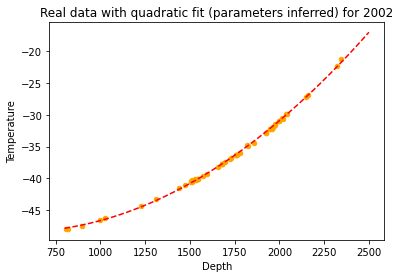

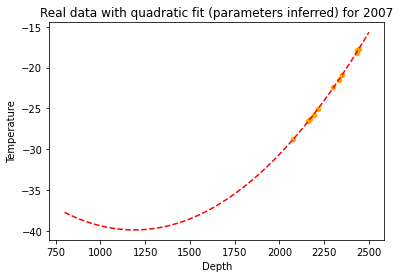

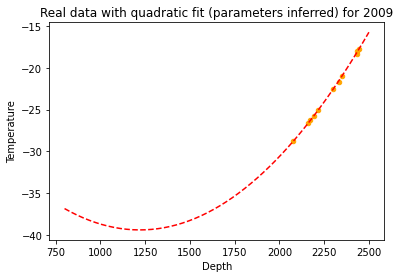

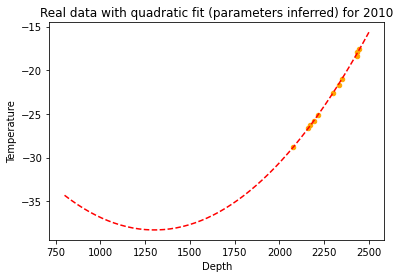

In [2]:
# load real data
data_2002 = io.load_ice_data("amanda_temp.txt", data_year=2002,temp_errors=1., depth_errors=2) 
data_2007 = io.load_ice_data("icecube_temp.2007.txt", data_year=2007,temp_errors=1., depth_errors=2)
data_2009 = io.load_ice_data("icecube_temp.2009.txt", data_year=2009,temp_errors=1., depth_errors=2)
data_2010 = io.load_ice_data("icecube_temp.2010.txt", data_year=2010,temp_errors=1., depth_errors=2)

data = [data_2002, data_2007, data_2009, data_2010]
x = np.linspace(800,2500)

for year in range(len(data)):
    params, cov_mat = m.fit_quad(data[year])
    #get stdev of parameters from covariance matrix
    param_errors = np.sqrt(np.diag(cov_mat))
    
    # print formatting function adapted from HW 6 solutions
    print("\nBest fit values for real data of {}:".format(data[year]['data_year'][0]))
    for value, sigma, name in zip(params, param_errors, 'bmq'):
        print('{} = {:.3} ± {:.3}'.format(name, value, sigma))

    x.sort()    
    data[year].plot(x='Depth', y='Temperature', kind='scatter', yerr=0.1,color='orange')
    plt.plot(x, params[2]*x**2 + params[1]*x + params[0], linestyle='dashed', color='red')
    plt.title("Real data with quadratic fit (parameters inferred) for {}".format(data[year]['data_year'][0]))

____
# Inference on all years, MCMC

## Quadratic fit

/usr/local/lib/python3.9/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [C_2, C_1, C_0]


Sampling 4 chains for 1_500 tune and 2_500 draw iterations (6_000 + 10_000 draws total) took 31 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using th

Paremters from MCMC for the year 2002
[-4.61606008e+01 -8.54332600e-03  8.07900000e-06]


/usr/local/lib/python3.9/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [C_2, C_1, C_0]


Sampling 4 chains for 1_500 tune and 2_500 draw iterations (6_000 + 10_000 draws total) took 38 seconds.
The acceptance probability does not match the target. It is 0.8851347163921437, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/usr/local/lib/pyt

Paremters from MCMC for the year 2007
[-4.9863839e+01 -7.2364030e-03  8.3350000e-06]


/usr/local/lib/python3.9/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [C_2, C_1, C_0]


Sampling 4 chains for 1_500 tune and 2_500 draw iterations (6_000 + 10_000 draws total) took 38 seconds.
The acceptance probability does not match the target. It is 0.8848130331698918, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/usr/local/lib/pyt

Paremters from MCMC for the year 2009
[-4.99031948e+01 -7.20868100e-03  8.32100000e-06]


/usr/local/lib/python3.9/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [C_2, C_1, C_0]


Sampling 4 chains for 1_500 tune and 2_500 draw iterations (6_000 + 10_000 draws total) took 46 seconds.
There were 211 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7214235080884139, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model ar

Paremters from MCMC for the year 2010
[-5.05262146e+01 -6.59983400e-03  8.17300000e-06]


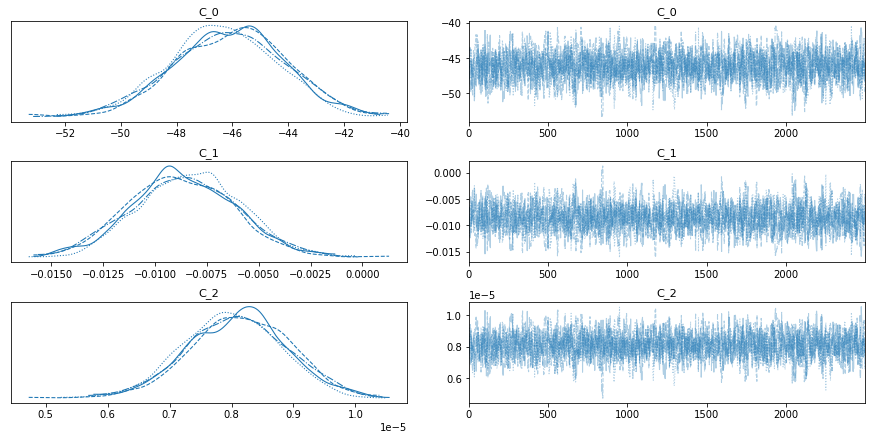

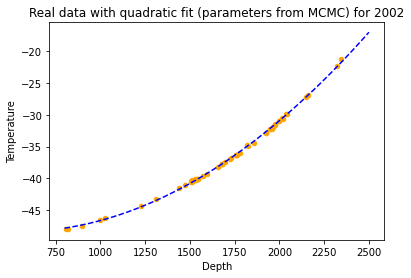

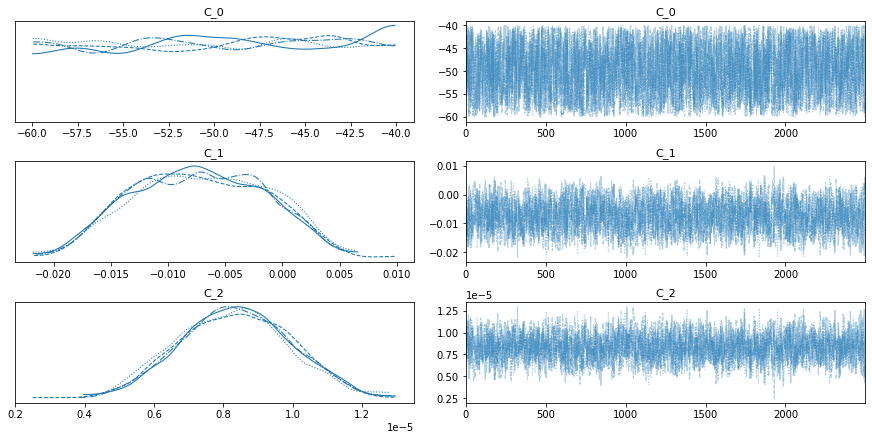

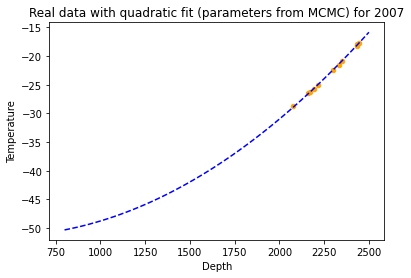

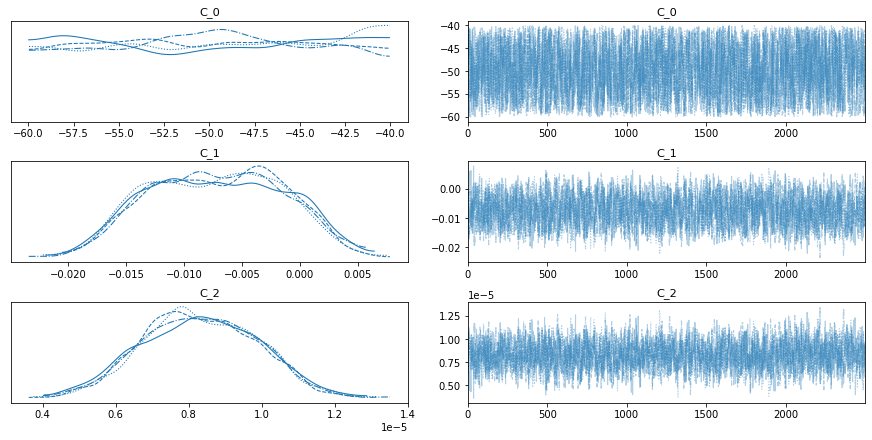

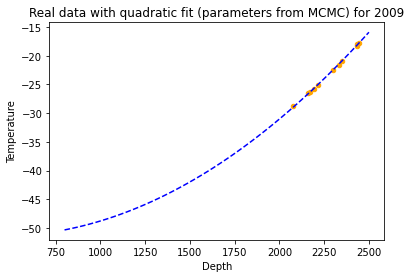

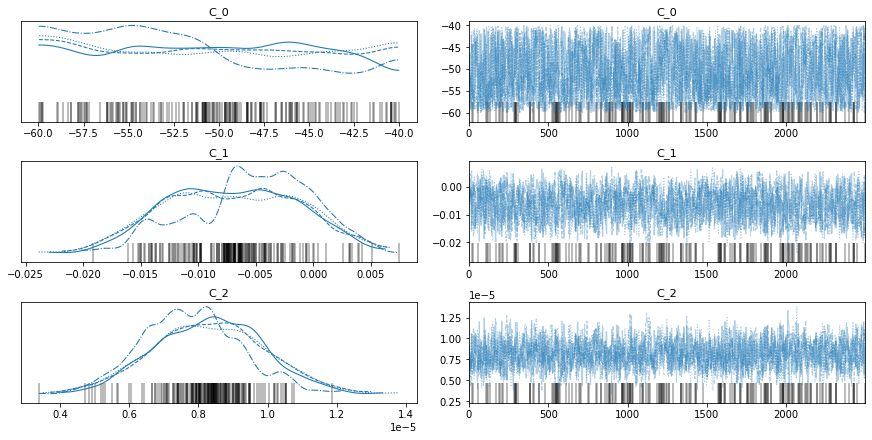

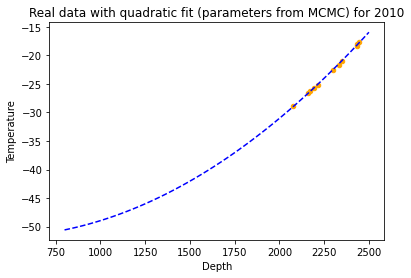

In [3]:
#MCMC on real data
init_guess_all = [{'C_0':-50, 'C_1':-0.0085, 'C_2':8.06e-06},
                  {'C_0':-50, 'C_1':-0.0336, 'C_2':1.41e-05},
                  {'C_0':-50, 'C_1':-0.0353, 'C_2':1.45e-05},
                  {'C_0':-50, 'C_1':-0.0410, 'C_2':1.48e-05}] #based on the results from the algebraic fit of all datasets

#base all initial guesses on amanda dataset algebraic fit
'''
init_guess_all = [{'C_0':-46, 'C_1':-0.009, 'C_2':8.07e-06},
                  {'C_0':-46, 'C_1':-0.009, 'C_2':8.07e-06},
                  {'C_0':-46, 'C_1':-0.009, 'C_2':8.07e-06},
                  {'C_0':-46, 'C_1':-0.009, 'C_2':8.07e-06}]
'''
year_list = []
temp_list = []
pred_errs_list = []
for year in range(len(data)):
    traces = m.fit_quad_MCMC(data[year], init_guess_all[year]) # returns params in order b, m, q
    #using helper function to extract params and param errors from traces
    params, param_errors = m.get_params(2, traces, input_traces = True)

    print("Paremters from MCMC for the year {}".format(data[year]['data_year'][0]))
    print(params)
    
    year_list.append(data[year]['data_year'][0])
    temp_list.append(params[0])
    pred_errs_list.append(param_errors[0])
    
    data[year].plot(x='Depth', y='Temperature', kind='scatter', yerr=0.1,color='orange')
    plt.plot(x, params[2]*x**2 + params[1]*x + params[0], linestyle='dashed', color='blue')
    plt.title("Real data with quadratic fit (parameters from MCMC) for {}".format(data[year]['data_year'][0]))

## MCMC, generalized 


Paremters from MCMC for the year 2002
[-4.62037214e+01 -8.49350069e-03  8.06586392e-06]
Paremters from MCMC for the year 2007
[-4.23026835e+01 -1.39155728e-02  9.80529836e-06]
Paremters from MCMC for the year 2009
[-4.47674100e+01 -1.16562765e-02  9.28130035e-06]
Paremters from MCMC for the year 2010
[-4.10909064e+01 -1.50659134e-02  1.00654799e-05]
   year  temperature  prediction_errors
0  2002   -46.203721           1.558168
1  2007   -42.302683           1.044909
2  2009   -44.767410           1.123215
3  2010   -41.090906           1.016899


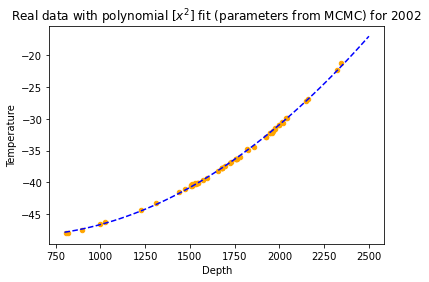

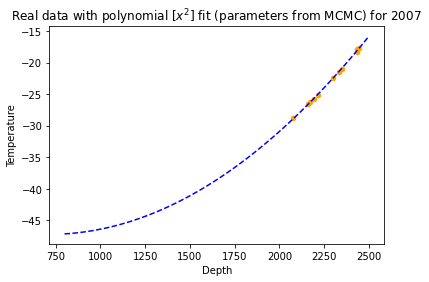

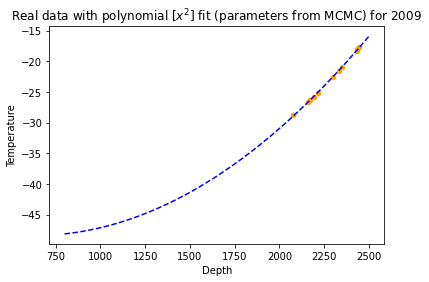

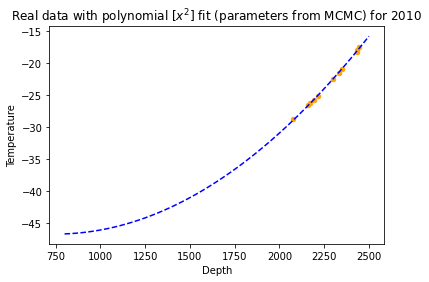

In [4]:
n = 2
init_guess_all1 = [{'C_0':-50, 'C_1':-0.0008, 'C_2':8.10e-06},
                  {'C_0':-42, 'C_1':-0.0007, 'C_2':8.30e-06},
                  {'C_0':-44, 'C_1':-0.0007, 'C_2':8.30e-06},
                  {'C_0':-41, 'C_1':-0.0007, 'C_2':8.30e-06}] #based on the results from the algebraic fit of all datasets (see above)
best_fit_list1 = []
best_fit_errors_list1 = []
for year in range(len(data)):
        traces, best_fit1 = m.n_polyfit_MCMC(n, data[year], init_guess_all1[year]) # returns params in order C_0, C_1, C_2,...
        params, errors = m.get_params(n, best_fit1)
        best_fit_list1.append(params)
        best_fit_errors_list1.append(errors)
# plot fit
m.plot_polyfit(data, best_fit_list1)
# get timetable
timetable1 = m.get_timetable(data, best_fit_list1, best_fit_errors_list1)
print(timetable1)


Paremters from MCMC for the year 2002
[-4.96357953e+01 -1.00561230e-03  2.98452922e-06  1.09146295e-09]
Paremters from MCMC for the year 2007
[-4.21301239e+01 -8.96254328e-03  5.35187083e-06  9.83117025e-10]
Paremters from MCMC for the year 2009
[-4.32476910e+01 -8.41989677e-03  5.55362540e-06  8.81329287e-10]
Paremters from MCMC for the year 2010
[-4.09465422e+01 -1.83113778e-03 -1.64354097e-06  2.57024599e-09]
   year  temperature  prediction_errors
0  2002   -49.635795           1.995001
1  2007   -42.130124           1.056465
2  2009   -43.247691           1.098721
3  2010   -40.946542           1.110094


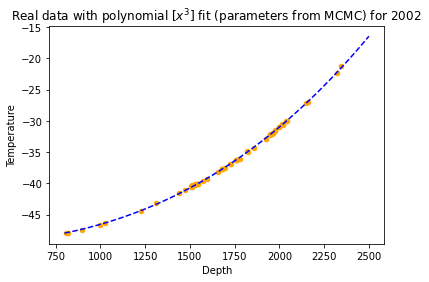

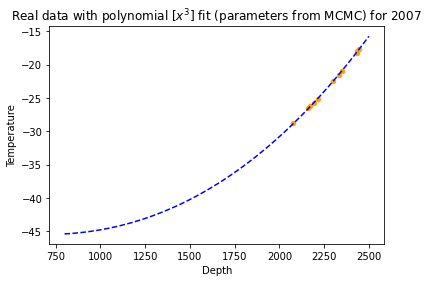

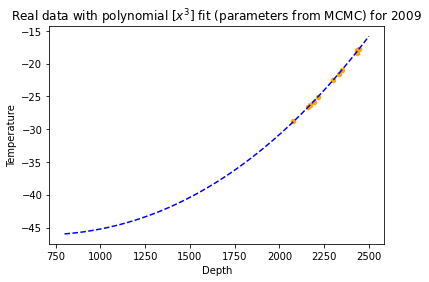

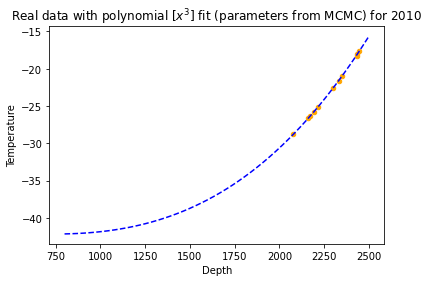

In [5]:
n = 3
init_guess_all2 = [{'C_0':-52, 'C_1':-0.0008, 'C_2':8.10e-06, 'C_3':0.00},
                  {'C_0':-42, 'C_1':-0.0007, 'C_2':8.30e-06, 'C_3':0.00},
                  {'C_0':-43, 'C_1':-0.0007, 'C_2':8.30e-06, 'C_3':0.00},
                  {'C_0':-41, 'C_1':-0.0007, 'C_2':8.30e-06, 'C_3':0.00}] #based on the results from the algebraic fit of all datasets (see above)

best_fit_list2 = []
best_fit_errors_list2 = []
for year in range(len(data)):
        traces, best_fit2 = m.n_polyfit_MCMC(n, data[year], init_guess_all2[year]) # returns params in order C_0, C_1, C_2,...
        params, errors = m.get_params(n, best_fit2)
        best_fit_list2.append(params)
        best_fit_errors_list2.append(errors)
# plot fit
m.plot_polyfit(data, best_fit_list2)
# get timetable
timetable2 = m.get_timetable(data, best_fit_list2, best_fit_errors_list2)
print(timetable2)


Paremters from MCMC for the year 2002
[-4.97468629e+01 -2.28190298e-03  5.87081576e-06 -8.12922053e-10
  3.94613943e-13]
Paremters from MCMC for the year 2007
[-4.21266220e+01 -7.90835207e-03  6.12334528e-06 -3.03941561e-10
  3.25872861e-13]
Paremters from MCMC for the year 2009
[-4.32243619e+01 -6.80554453e-03  6.49682855e-06 -8.86669421e-10
  4.55292692e-13]
Paremters from MCMC for the year 2010
[-4.10311009e+01 -7.45782311e-03  5.98606824e-06 -8.41579199e-10
  5.06537477e-13]
   year  temperature  prediction_errors
0  2002   -49.746863           0.901927
1  2007   -42.126622           1.019151
2  2009   -43.224362           1.976473
3  2010   -41.031101           1.054944


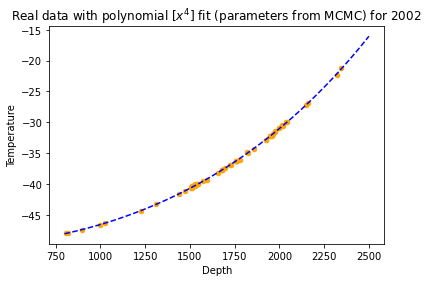

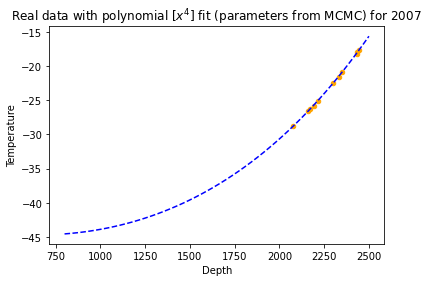

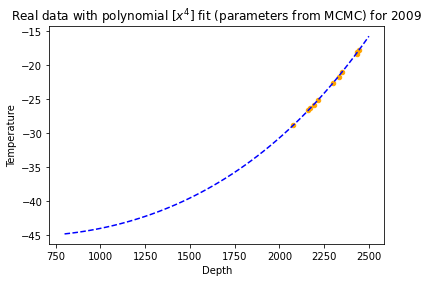

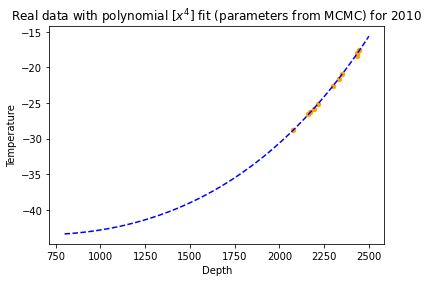

In [6]:
n = 4
init_guess_all3 = [{'C_0':-51, 'C_1':-0.0008, 'C_2':8.10e-06, 'C_3':1.09e-09, 'C_4':0.00},
                  {'C_0':-42, 'C_1':-0.0007, 'C_2':8.30e-06, 'C_3':9.83e-10, 'C_4':0.00},
                  {'C_0':-43, 'C_1':-0.0007, 'C_2':8.30e-06, 'C_3':8.81e-10, 'C_4':0.00},
                  {'C_0':-41, 'C_1':-0.0007, 'C_2':8.30e-06, 'C_3':2.57e-09, 'C_4':0.00}]
best_fit_list3 = []
best_fit_errors_list3 = []
for year in range(len(data)):
        traces, best_fit3 = m.n_polyfit_MCMC(n, data[year], init_guess_all3[year]) # returns params in order C_0, C_1, C_2,...
        params, errors = m.get_params(n, best_fit3)
        best_fit_list3.append(params)
        best_fit_errors_list3.append(errors)
# plot fit
m.plot_polyfit(data, best_fit_list3)
# get timetable
timetable3 = m.get_timetable(data, best_fit_list3, best_fit_errors_list3)
print(timetable3)

## Odds ratio using MCMC models

In [7]:
# comparison of 2nd order and 3rd order polynomials
n_M1 = 2
n_M2 = 3

odds_ratios = m.get_odds_ratio(n_M1, n_M2, data, best_fit1, best_fit2)
for year in range(len(data)):
    print('The odds ratio for the data set of the year {} is:'.format(data[year]['data_year'][0]), odds_ratios[year])

Likelihood 1:  4.893055147669015e-26
Likelihood 2:  5.674737474935101e-77
Likelihood 1:  3.7204588889538355e-05
Likelihood 2:  3.7624304910236055e-05
Likelihood 1:  3.796238345267536e-05
Likelihood 2:  3.854321119967485e-05
Likelihood 1:  3.7219994075083124e-05
Likelihood 2:  3.8232518625545175e-05
The odds ratio for the data set of the year 2002 is: 2.866330914741502e+45
The odds ratio for the data set of the year 2007 is: 3.2871537426780674e-06
The odds ratio for the data set of the year 2009 is: 3.2741424384449105e-06
The odds ratio for the data set of the year 2010 is: 3.23620022009233e-06


In [16]:
# comparison of 3rd order and 4th order polynomials
n_M1 = 3
n_M2 = 4

odds_ratios = m.get_odds_ratio(n_M1, n_M2, data, best_fit2, best_fit3)
for year in range(len(data)):
    print('The odds ratio for the data set of the year {} is:'.format(data[year]['data_year'][0]), odds_ratios[year])

Likelihood 1:  5.674737474935101e-77
Likelihood 2:  1.5536796969769025e-59
Likelihood 1:  3.7624304910236055e-05
Likelihood 2:  3.76146248301535e-05
Likelihood 1:  3.854321119967485e-05
Likelihood 2:  3.854119378977717e-05
Likelihood 1:  3.8232518625545175e-05
Likelihood 2:  3.824311913505482e-05
The odds ratio for the data set of the year 2002 is: 6.1247676441687876e-24
The odds ratio for the data set of the year 2007 is: 1.677324474004733e-06
The odds ratio for the data set of the year 2009 is: 1.676980703257595e-06
The odds ratio for the data set of the year 2010 is: 1.676428114018531e-06


____
# After inferring temperature at ground level, use GPR

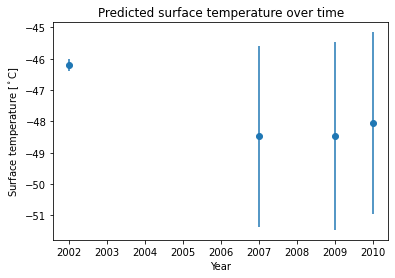

In [9]:
timetable = pd.DataFrame({'year': [2002, 2007, 2009, 2010],
                          'temperature': [-46.209329, -48.482208, -48.470786, -48.053251],
                          'prediction_errors': [0.190821, 2.879300, 2.996332, 2.900150]})
plt.errorbar(timetable['year'], timetable['temperature'], yerr=timetable['prediction_errors'], fmt='o')
plt.xlabel('Year')
plt.ylabel('Surface temperature [$^\\circ$C]')
plt.title('Predicted surface temperature over time')
plt.show()

For a polynomial of n=2


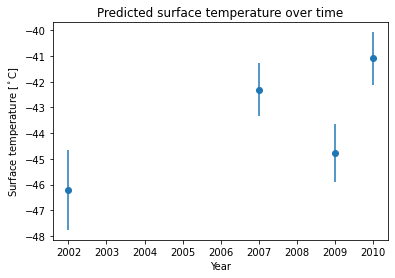

In [10]:
print('For a polynomial of n=2')
plt.errorbar(timetable1['year'], timetable1['temperature'], yerr=timetable1['prediction_errors'], fmt='o')
plt.xlabel('Year')
plt.ylabel('Surface temperature [$^\\circ$C]')
plt.title('Predicted surface temperature over time')
plt.show()

For a polynomial of n=3


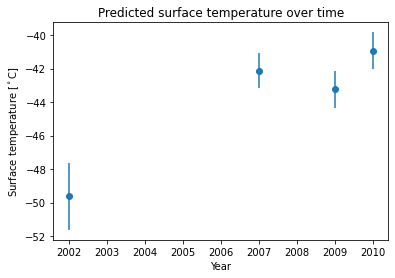

In [11]:
print('For a polynomial of n=3')
plt.errorbar(timetable2['year'], timetable2['temperature'], yerr=timetable2['prediction_errors'], fmt='o')
plt.xlabel('Year')
plt.ylabel('Surface temperature [$^\\circ$C]')
plt.title('Predicted surface temperature over time')
plt.show()

For a polynomial of n=4


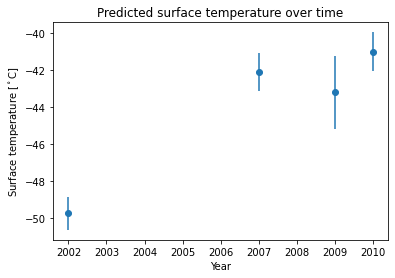

In [12]:
print('For a polynomial of n=4')
plt.errorbar(timetable3['year'], timetable3['temperature'], yerr=timetable3['prediction_errors'], fmt='o')
plt.xlabel('Year')
plt.ylabel('Surface temperature [$^\\circ$C]')
plt.title('Predicted surface temperature over time')
plt.show()

/usr/local/lib/python3.9/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma, a, l]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.
There were 51 divergences after tuning. Increase `target_accept` or reparameterize.
There were 57 divergences after tuning. Increase `target_accept` or reparameterize.
There were 99 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7105756653324142, but should be close to 0.8. Try to increase the number of tuning steps.
There were 33 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


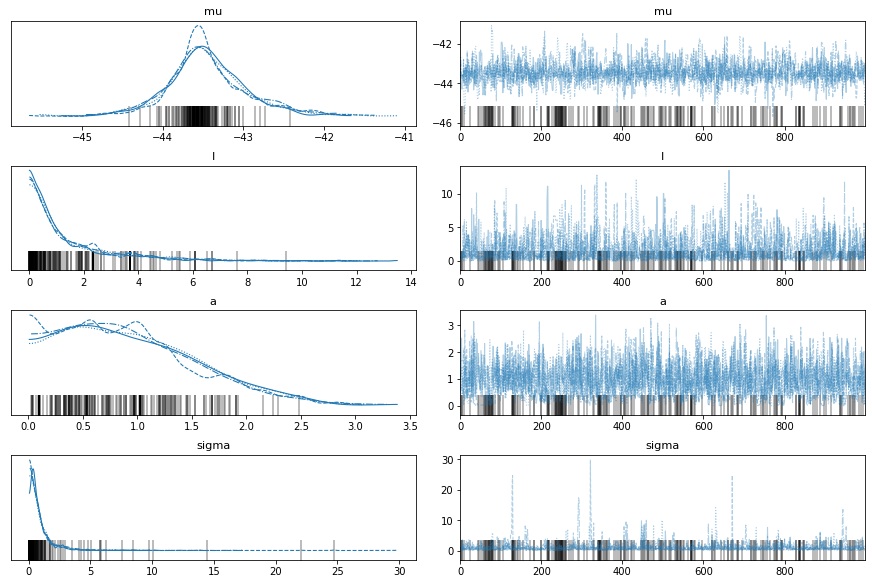

/usr/local/lib/python3.9/site-packages/pymc3/sampling.py:1688: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


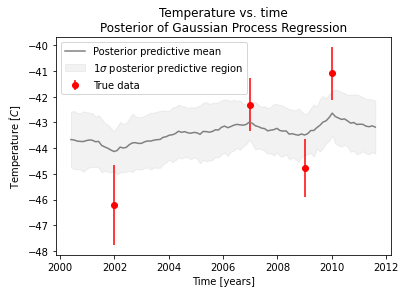

/usr/local/lib/python3.9/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma, a, l]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 36 seconds.
There were 117 divergences after tuning. Increase `target_accept` or reparameterize.
There were 85 divergences after tuning. Increase `target_accept` or reparameterize.
There were 57 divergences after tuning. Increase `target_accept` or reparameterize.
There were 56 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


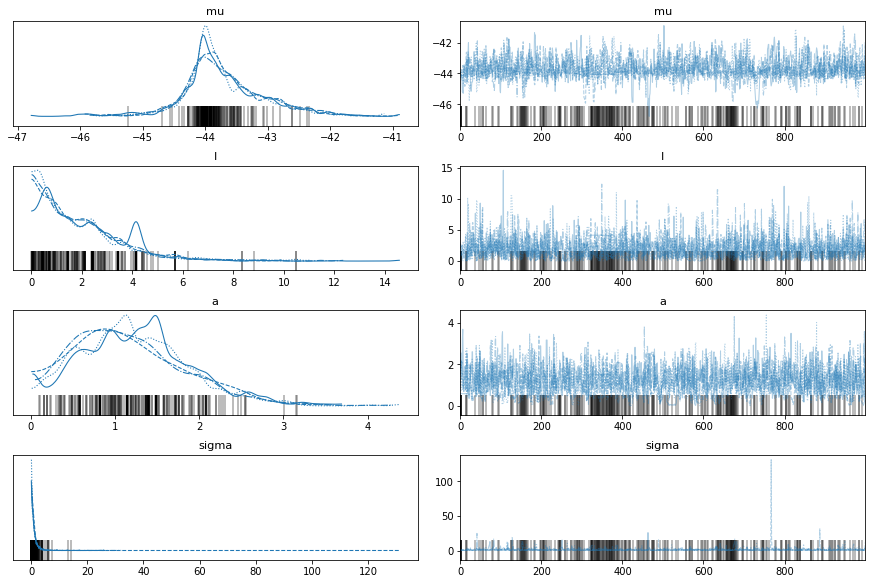

/usr/local/lib/python3.9/site-packages/pymc3/sampling.py:1688: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


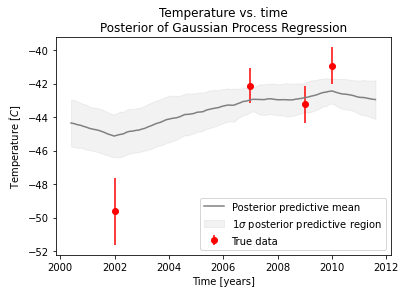

/usr/local/lib/python3.9/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma, a, l]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.
There were 89 divergences after tuning. Increase `target_accept` or reparameterize.
There were 68 divergences after tuning. Increase `target_accept` or reparameterize.
There were 92 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6901209024641224, but should be close to 0.8. Try to increase the number of tuning steps.
There were 41 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


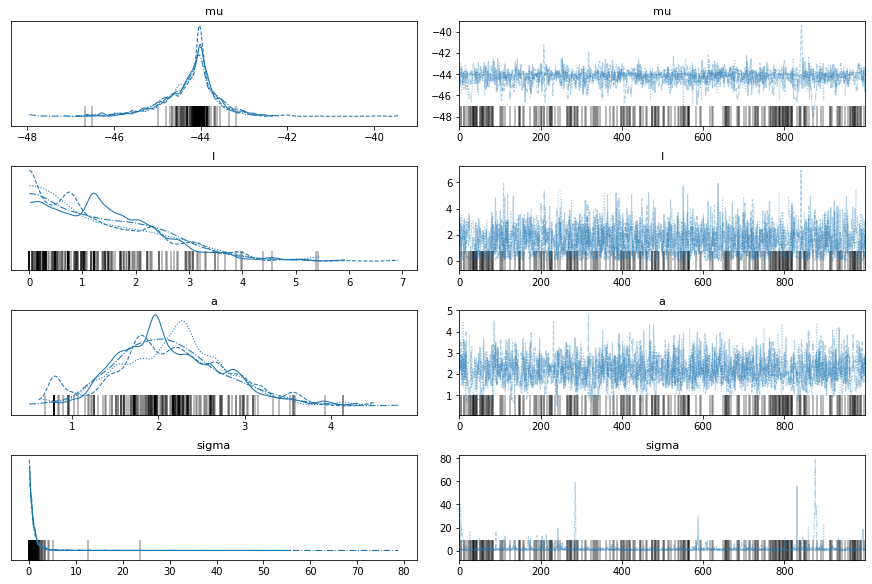

/usr/local/lib/python3.9/site-packages/pymc3/sampling.py:1688: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


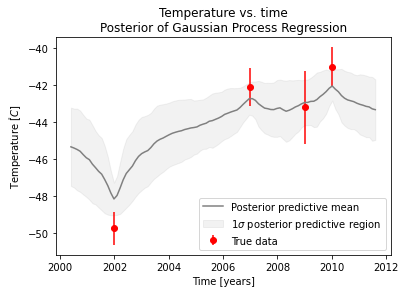

In [13]:
# fit GPR without forecasting
#gpr_model = m.fit_GPR(timetable)
gpr_model1 = m.fit_GPR(timetable1)
gpr_model2 = m.fit_GPR(timetable2)
gpr_model3 = m.fit_GPR(timetable3)

/usr/local/lib/python3.9/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma, a, l]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 29 seconds.
There were 97 divergences after tuning. Increase `target_accept` or reparameterize.
There were 61 divergences after tuning. Increase `target_accept` or reparameterize.
There were 32 divergences after tuning. Increase `target_accept` or reparameterize.
There were 143 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7054686179244755, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn

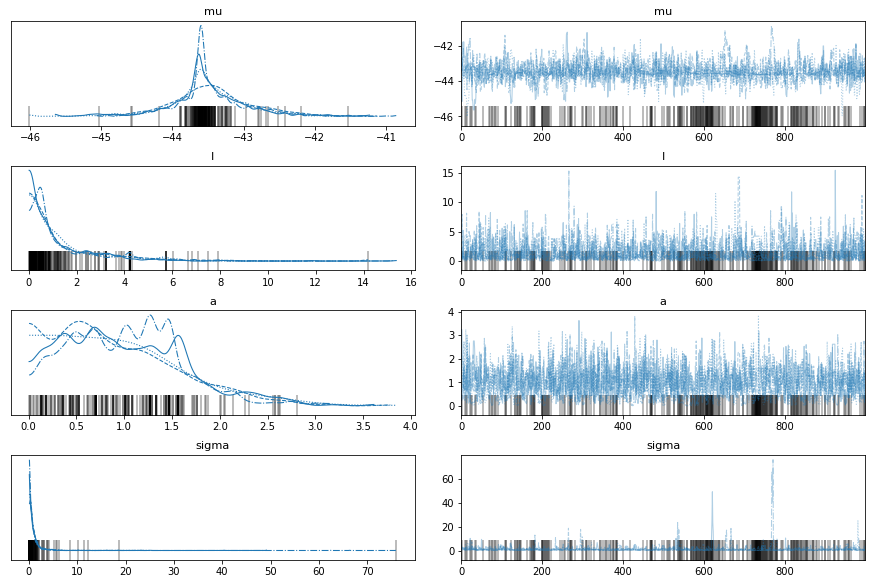

/usr/local/lib/python3.9/site-packages/pymc3/sampling.py:1688: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


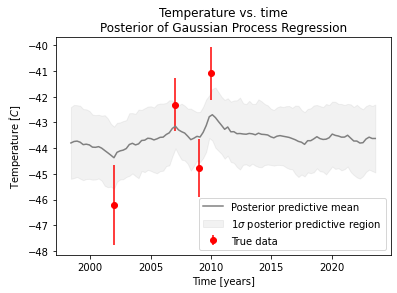

/usr/local/lib/python3.9/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma, a, l]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.
There were 39 divergences after tuning. Increase `target_accept` or reparameterize.
There were 89 divergences after tuning. Increase `target_accept` or reparameterize.
There were 60 divergences after tuning. Increase `target_accept` or reparameterize.
There were 44 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


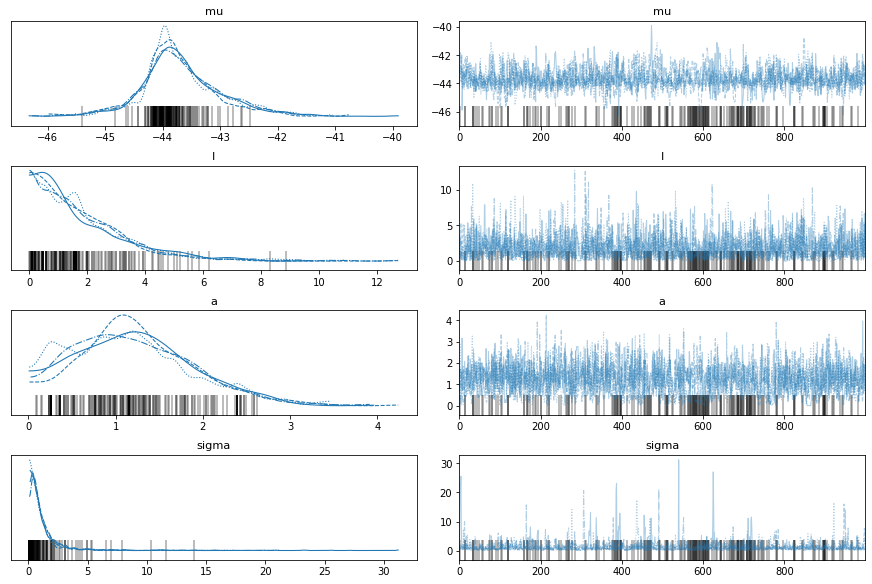

/usr/local/lib/python3.9/site-packages/pymc3/sampling.py:1688: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


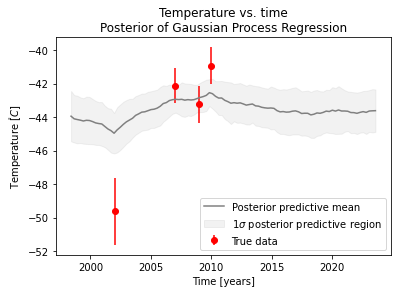

/usr/local/lib/python3.9/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma, a, l]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.
There were 65 divergences after tuning. Increase `target_accept` or reparameterize.
There were 71 divergences after tuning. Increase `target_accept` or reparameterize.
There were 126 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7193305660542957, but should be close to 0.8. Try to increase the number of tuning steps.
There were 181 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5819916847481895, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the

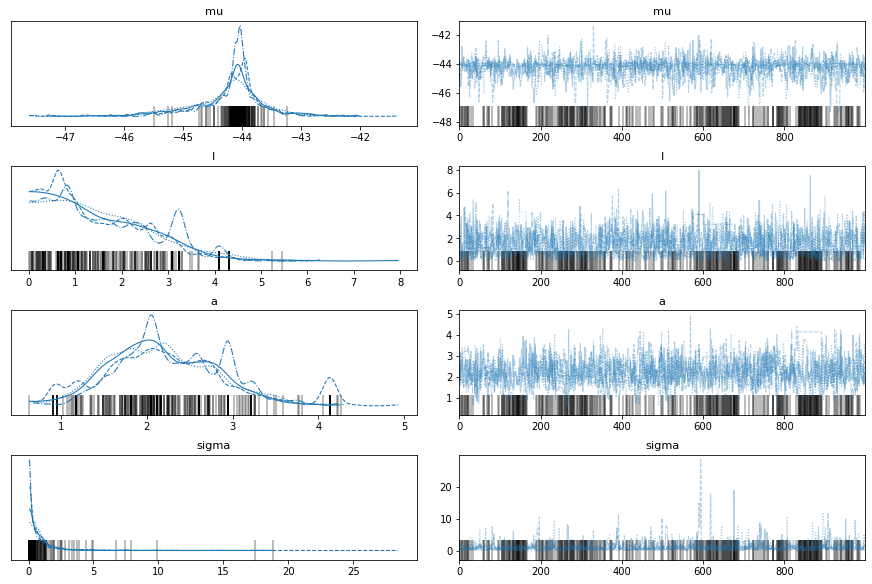

/usr/local/lib/python3.9/site-packages/pymc3/sampling.py:1688: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


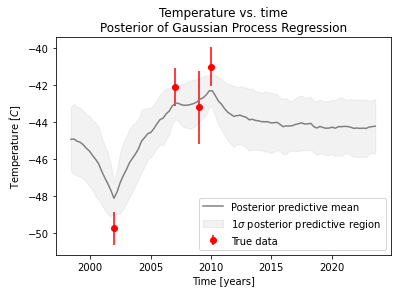

In [14]:
# fit GPR with forecasting
#_ = m.fit_GPR(timetable, num_forecast_years = 10)
_ = m.fit_GPR(timetable1, num_forecast_years = 10)
_ = m.fit_GPR(timetable2, num_forecast_years = 10)
_ = m.fit_GPR(timetable3, num_forecast_years = 10)

___